In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:

newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)



In [10]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.87

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.84      0.85       236
           comp.graphics       0.84      0.84      0.84       287
 comp.os.ms-windows.misc       0.86      0.84      0.85       290
comp.sys.ibm.pc.hardware       0.67      0.85      0.75       285
   comp.sys.mac.hardware       0.95      0.83      0.88       312
          comp.windows.x       0.96      0.83      0.89       308
            misc.forsale       0.87      0.77      0.82       276
               rec.autos       0.93      0.91      0.92       304
         rec.motorcycles       0.92      0.96      0.94       279
      rec.sport.baseball       0.95      0.96      0.96       308
        rec.sport.hockey       0.91      0.98      0.94       309
               sci.crypt       0.86      0.98      0.91       290
         sci.electronics       0.92      0.80      0.86       304
                 sci.med       0.97 

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [15]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

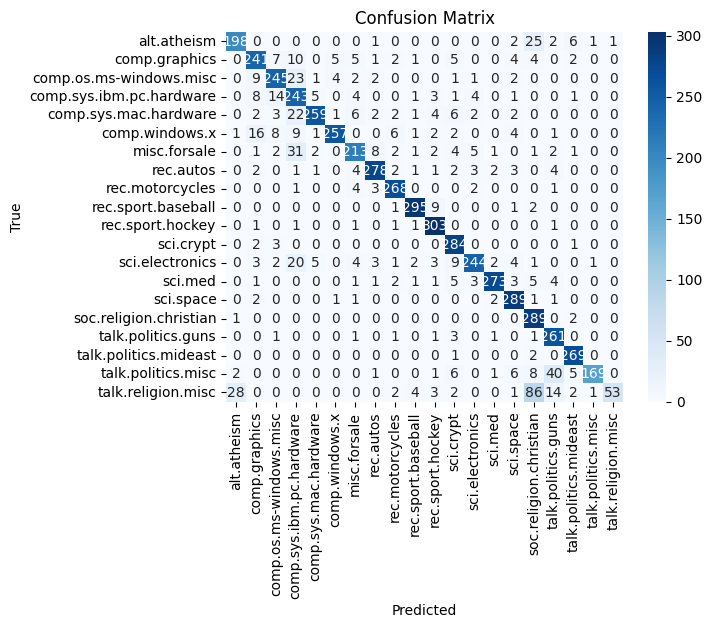

In [16]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
feature_names = vectorizer.get_feature_names_out()
feature_log_probs = clf.feature_log_prob_[0]
top_features_idx = np.argsort(feature_log_probs)[::-1][:10]
top_features = [feature_names[i] for i in top_features_idx]
top_features_probs = feature_log_probs[top_features_idx]

C:\Users\Mrityunjya\AppData\Local\Temp\ipykernel_3728\504802140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_probs, y=top_features, palette='viridis')


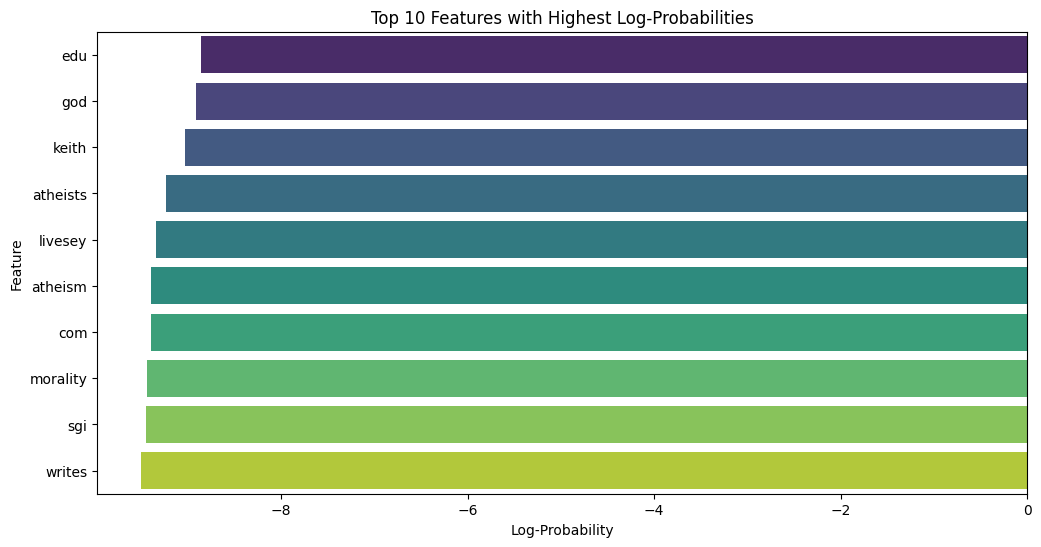

In [22]:

plt.figure(figsize=(12, 6))
sns.barplot(x=top_features_probs, y=top_features, palette='viridis')
plt.title('Top 10 Features with Highest Log-Probabilities')
plt.xlabel('Log-Probability')
plt.ylabel('Feature')
plt.show()


In [19]:
# New data to classify
new_documents = [
    "The space shuttle launch was delayed due to weather conditions.",
    "The new Python release includes several bug fixes and new features.",
    "The stock market saw a significant drop in technology shares today."
]

In [20]:
# Preprocess the new data
X_new_tfidf = vectorizer.transform(new_documents)

# Predict the categories
predicted_categories = clf.predict(X_new_tfidf)

In [21]:
for doc, category in zip(new_documents, predicted_categories):
    print(f"Document: {doc}\nPredicted Category: {target_names[category]}\n")

Document: The space shuttle launch was delayed due to weather conditions.
Predicted Category: sci.space

Document: The new Python release includes several bug fixes and new features.
Predicted Category: comp.windows.x

Document: The stock market saw a significant drop in technology shares today.
Predicted Category: rec.autos

